In [2]:
pip install pandas numpy matplotlib seaborn plotly dash

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [4]:
import pandas as pd
import os

file_path = r'C:\Users\ajith\Downloads\nmms.csv'  # or use forward slashes

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("CSV loaded successfully!")
    print(df.head())
else:
    print(f"File not found: {file_path}")


CSV loaded successfully!
   SLNo       DISTRICT     ROLLNO     EMIS NO              NAME         DOB  \
0  6587    TIRUVALLORE  252103160  2017362237      NEELAMEGAM E  23-06-2011   
1  6588     SIVAGANGAI  208111029  2017481378  AYESHA MARIYAM M  28-04-2011   
2  6589    TIRUVALLORE  252103163  1021136249        SREELOGA R  28-05-2011   
3  6590       TIRUPPUR  217106388  2023862700     SUDHARSHAN  T  12-07-2012   
4  6591  RAMANATHAPURA  207121148  1020928194         PREETHI S  31-10-2011   

   GENDER   COMMUNITY DISABLITY  \
0    MALE          SC     Blind   
1  FEMALE  BC(Muslim)     Blind   
2    MALE          ST     Blind   
3    MALE          BC     Blind   
4  FEMALE         MBC     Blind   

                                         SCHOOL NAME  MAT  SAT  TOTAL  \
0  GOVERNMENT HIGHER SECONDARY SCHOOL FOR THE\nVI...   56   44    100   
1             GOVT GIRLS HR SEC SCHOOL THIRUPPUVANAM   47   45     92   
2  GOVERNMENT HIGHER\nSECONDARY SCHOOL FOR THE VI...   51   39     90 

In [5]:
df.columns

Index(['SLNo', 'DISTRICT', 'ROLLNO', 'EMIS NO', 'NAME', 'DOB', 'GENDER',
       'COMMUNITY', 'DISABLITY', 'SCHOOL NAME', 'MAT', 'SAT', 'TOTAL',
       'SELECTED CATEGORY'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.columns

Index(['SLNo', 'DISTRICT', 'ROLLNO', 'EMIS_NO', 'NAME', 'DOB', 'GENDER',
       'COMMUNITY', 'DISABLITY', 'SCHOOL_NAME', 'MAT', 'SAT', 'TOTAL',
       'SELECTED_CATEGORY'],
      dtype='object')

In [8]:
df.describe()

,SLNo,ROLLNO,EMIS_NO,MAT,SAT,TOTAL
count,6695.000000,6.695000e+03,6.695000e+03,6695.000000,6695.000000,6695.000000
mean,3348.000000,2.212422e+08,1.518723e+09,59.681553,45.523226,105.204780
std,1932.824358,1.533951e+07,5.000370e+08,6.162124,7.599850,10.379289
min,1.000000,2.011010e+08,1.014384e+09,24.000000,23.000000,58.000000
25%,1674.500000,2.071021e+08,1.020502e+09,56.000000,40.000000,99.000000
50%,3348.000000,2.201161e+08,1.028464e+09,60.000000,45.000000,103.000000
75%,5021.500000,2.331021e+08,2.020630e+09,64.000000,50.000000,110.000000
max,6695.000000,2.551190e+08,2.028677e+09,83.000000,87.000000,170.000000


In [9]:
df.isnull().sum()

SLNo                    0
DISTRICT                0
ROLLNO                  0
EMIS_NO                 0
NAME                    0
DOB                     0
GENDER                  0
COMMUNITY               0
DISABLITY            6584
SCHOOL_NAME             0
MAT                     0
SAT                     0
TOTAL                   0
SELECTED_CATEGORY       0
dtype: int64

In [10]:
summary = df.groupby(['SCHOOL_NAME', 'COMMUNITY']).size().reset_index(name='total_students')

print(summary)

                                        SCHOOL_NAME COMMUNITY  total_students
0     10TH WARD MUNICIPAL MIDDLE SCHOOL, DEVAKOTTAI        SC               1
1     16TH WARD MUNICIPAL MIDDLE SCHOOL, DEVAKOTTAI        SC               1
2                36 GST HR SEC SCHOOL SANKARANKOVIL        SC               1
3               A D H HIGH SCHOOL PERIYANAYAGIPURAM        BC               1
4               A R GOVT GIRLS HR SEC SCHOOL CUMBUM        BC               5
...                                             ...       ...             ...
3880                            pums Sikkarayapuram       MBC               2
3881                            pums Sikkarayapuram     SC(A)               1
3882                               pums melpadappai        BC               2
3883                               pums melpadappai       MBC               1
3884                               pums melpadappai        SC               1

[3885 rows x 3 columns]


In [11]:
pivot = df.pivot_table(index='SCHOOL_NAME', columns='COMMUNITY', values='SLNo', aggfunc='count', fill_value=0)

print(pivot)

COMMUNITY                                      BC  BC(Muslim)  General  MBC  \
SCHOOL_NAME                                                                   
10TH WARD MUNICIPAL MIDDLE SCHOOL, DEVAKOTTAI   0           0        0    0   
16TH WARD MUNICIPAL MIDDLE SCHOOL, DEVAKOTTAI   0           0        0    0   
36 GST HR SEC SCHOOL SANKARANKOVIL              0           0        0    0   
A D H HIGH SCHOOL PERIYANAYAGIPURAM             1           0        0    0   
A R GOVT GIRLS HR SEC SCHOOL CUMBUM             5           1        0    2   
...                                            ..         ...      ...  ...   
Z K M HR SEC SCHOOL- BODINAYAKANUR              1           0        0    1   
ZAMINDAR'S HR SEC SCHOOL, THURAIYUR 621010      1           1        0    2   
ZUBAIDA  HR SEC SCHOOL KAYALPATNAM              2           1        0    0   
pums Sikkarayapuram                             1           0        0    2   
pums melpadappai                                2   

In [12]:
# Add a total column
pivot['Total'] = pivot.sum(axis=1)

# Sort by total in descending order
pivot_sorted = pivot.sort_values('Total', ascending=False)

print(pivot_sorted)

COMMUNITY                                           BC  BC(Muslim)  General  \
SCHOOL_NAME                                                                   
ST MARY'S HR SEC SCHOOL EAST VELI STREET MADURAI-1  68           4        0   
ST MARY'S HR SEC SCHOOL DINDIGUL                    50           9        0   
KSHATRIYA GIRLS HR SEC SCHOOL VIRUDHUNAGAR          35           1        1   
CARMEL BOYS HR SEC SCHOOL RAMANPUTHUR NAGERCOIL     34           2        1   
ST XAVIER'S HR SEC SCHOOL PALAYAMKOTTAI             22           3        1   
...                                                 ..         ...      ...   
V S BOYS GOVERNMENT AIDED\nHIGHER SECONDARY SCH...   0           0        0   
V S BOYS GOVERNMENT AIDED HIGHER SECONDARY SCHO...   1           0        0   
V.V. MS.THEVARAM                                     0           0        0   
VALLAL PARI MUNICIPAL MIDDLE SCHOOL , VELIPATTINAM   0           0        0   
VANIGA VAISYA SANGA HIGH SCHOOL, SANKARANKOVIL      

In [13]:
# Calculate values per school
student_count = df.pivot_table(index='SCHOOL_NAME', values='SLNo', aggfunc='count', fill_value=0)
avg_mat = df.pivot_table(index='SCHOOL_NAME', values='MAT', aggfunc='mean', fill_value=0)
avg_sat = df.pivot_table(index='SCHOOL_NAME', values='SAT', aggfunc='mean', fill_value=0)
avg_total = df.pivot_table(index='SCHOOL_NAME', values='TOTAL', aggfunc='mean', fill_value=0)

# Rename columns for clarity
student_count = student_count.rename(columns={'SLNo': 'Student_Count'})
avg_mat = avg_mat.rename(columns={'MAT': 'Avg_MAT'})
avg_sat = avg_sat.rename(columns={'SAT': 'Avg_SAT'})
avg_total = avg_total.rename(columns={'TOTAL': 'Avg_TOTAL'})

# Concatenate all results into a single DataFrame
combined = pd.concat([student_count, avg_mat, avg_sat, avg_total], axis=1)

# Sort by student count descending
combined = combined.sort_values('Student_Count', ascending=False)

print(combined)




                                                    Student_Count    Avg_MAT  \
SCHOOL_NAME                                                                    
ST MARY'S HR SEC SCHOOL EAST VELI STREET MADURAI-1            105  63.552381   
ST MARY'S HR SEC SCHOOL DINDIGUL                               79  61.721519   
KSHATRIYA GIRLS HR SEC SCHOOL VIRUDHUNAGAR                     51  61.568627   
CARMEL BOYS HR SEC SCHOOL RAMANPUTHUR NAGERCOIL                46  60.043478   
ST XAVIER'S HR SEC SCHOOL PALAYAMKOTTAI                        40  59.450000   
...                                                           ...        ...   
V S BOYS GOVERNMENT AIDED\nHIGHER SECONDARY SCH...              1  59.000000   
V S BOYS GOVERNMENT AIDED HIGHER SECONDARY SCHO...              1  60.000000   
V.V. MS.THEVARAM                                                1  59.000000   
VALLAL PARI MUNICIPAL MIDDLE SCHOOL , VELIPATTINAM              1  59.000000   
VANIGA VAISYA SANGA HIGH SCHOOL, SANKARA

In [14]:
# Calculate per-school metrics
student_count = df.groupby('SCHOOL_NAME')['SLNo'].count().rename('Student_Count')
max_total = df.groupby('SCHOOL_NAME')['TOTAL'].max().rename('Max_TOTAL')

# Only calculate Avg_TOTAL for schools with at least 2 students
avg_total = df.groupby('SCHOOL_NAME').apply(
    lambda x: x['TOTAL'].mean() if len(x) >= 2 else None
).rename('Avg_TOTAL')

# Combine into a single DataFrame
combined = pd.concat([student_count, max_total, avg_total], axis=1)

# Remove schools where Avg_TOTAL is None (less than 2 students)
combined = combined[combined['Avg_TOTAL'].notnull()]

# Normalize each metric (Min-Max scaling)
combined['Student_Count_Norm'] = (combined['Student_Count'] - combined['Student_Count'].min()) / (combined['Student_Count'].max() - combined['Student_Count'].min())
combined['Max_TOTAL_Norm'] = (combined['Max_TOTAL'] - combined['Max_TOTAL'].min()) / (combined['Max_TOTAL'].max() - combined['Max_TOTAL'].min())
combined['Avg_TOTAL_Norm'] = (combined['Avg_TOTAL'] - combined['Avg_TOTAL'].min()) / (combined['Avg_TOTAL'].max() - combined['Avg_TOTAL'].min())

# Calculate ranking score
combined['Ranking_Score'] = (
    0.35 * combined['Student_Count_Norm'] +
    0.35 * combined['Max_TOTAL_Norm'] +
    0.30 * combined['Avg_TOTAL_Norm']
)

# Sort by Ranking_Score in descending order
combined = combined.sort_values('Ranking_Score', ascending=False)

print(combined[['Student_Count', 'Max_TOTAL', 'Avg_TOTAL', 'Ranking_Score']])

                                                    Student_Count  Max_TOTAL  \
SCHOOL_NAME                                                                    
ST MARY'S HR SEC SCHOOL EAST VELI STREET MADURAI-1            105        157   
CARMEL BOYS HR SEC SCHOOL RAMANPUTHUR NAGERCOIL                46        170   
ST MARY'S HR SEC SCHOOL DINDIGUL                               79        140   
KSHATRIYA GIRLS HR SEC SCHOOL VIRUDHUNAGAR                     51        151   
ST JOSEPH'S COLLEGE HR SEC SCHOOL, TRICHIRAPPALLI              34        155   
...                                                           ...        ...   
ST PHILOMENA'S HIGH SCHOOL SOWRIPALAYAM                         2         98   
MUNICIPAL MIDDLE SCHOOL, MANJALPATTANAM                         2         94   
GOVT GIRLS HR SEC SCHOOL KOTTUR                                 2         99   
GOVERNMENT HIGHER\nSECONDARY SCHOOL FOR THE VIS...              2         90   
THE GUGAI HR SEC SCHOOL GUGAI SALEM     

C:\Users\ajith\AppData\Local\Temp\ipykernel_14188\2183666796.py:6: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [15]:
import matplotlib.pyplot as plt
import textwrap

# Remove DISTRICT from combined if it exists
if 'DISTRICT' in combined.columns:
    combined = combined.drop(columns=['DISTRICT'])

# Merge DISTRICT info into combined DataFrame (do this only once)
school_district = df[['SCHOOL_NAME', 'DISTRICT']].drop_duplicates().set_index('SCHOOL_NAME')
combined = combined.merge(school_district, left_index=True, right_index=True)


# Get top 10 schools per district based on Ranking_Score
top10_per_district = (
    combined
    .sort_values(['DISTRICT', 'Ranking_Score'], ascending=[True, False])
    .groupby('DISTRICT')
    .head(10)
)

print(top10_per_district[['DISTRICT', 'Student_Count', 'Max_TOTAL', 'Avg_TOTAL', 'Ranking_Score']])

# Define distinct colors for each chart
bar_colors = ['#4B8BBE', '#E06C75', '#98C379', '#FFD43B']  # blue, red, green, yellow

metrics = ['Ranking_Score', 'Student_Count', 'Max_TOTAL', 'Avg_TOTAL']


# Create output folder if it doesn't exist
output_folder = 'top10_school_charts'
os.makedirs(output_folder, exist_ok=True)

for district, group in top10_per_district.groupby('DISTRICT'):
    group_for_avg = group[group['Student_Count'] >= 2]
    fig, axs = plt.subplots(2, 2, figsize=(18, 26))
    fig.suptitle(f'Top 10 Schools in {district}', fontsize=16)
    for i, (ax, metric) in enumerate(zip(axs.flatten(), metrics)):
        if metric == 'Avg_TOTAL':
            group_sorted = group_for_avg.sort_values(metric, ascending=False)
        else:
            group_sorted = group.sort_values(metric, ascending=False)
        labels = [textwrap.fill(name, 15) for name in group_sorted.index]
        bars = ax.bar(
            labels,
            group_sorted[metric],
            color=bar_colors[i],
            edgecolor='black',
            linewidth=3,
            zorder=3
        )
        for bar in bars:
            bar.set_linewidth(3)
            bar.set_edgecolor('black')
            bar.set_zorder(3)
            bar.set_capstyle('round')
            bar.set_joinstyle('round')
            bar.set_alpha(0.95)
        ax.set_title(metric)
        ax.set_xlabel('School Name')
        ax.set_ylabel(metric)
        ax.set_xticklabels(labels, rotation=90, ha='center', fontsize=10)
        if metric == 'Ranking_Score':
            ax.set_ylim(bottom=0.2)
        elif metric in ['Max_TOTAL', 'Avg_TOTAL']:
            ax.set_ylim(bottom=60)
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)
        ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # Save figure to folder
    filename = f"{district.replace(' ', '_')}_top10_schools.png"
    plt.savefig(os.path.join(output_folder, filename), bbox_inches='tight')
    plt.close(fig)

                                             DISTRICT  Student_Count  \
SCHOOL_NAME                                                            
PUMS-KASANKOTTAI                             ARIYALUR             11   
GOVT HIGH SCHOOL SENGUNTHAPURAM              ARIYALUR              3   
PUMS KANGUZHI                                ARIYALUR              2   
PUMS MULLAIYUR                               ARIYALUR              6   
FATIMA GIRLS HR SEC SCHOOL JAYANKONDAM       ARIYALUR              2   
...                                               ...            ...   
KGMS VIRUDHUNAGAR                       VIRUDHU NAGAR             20   
K KAMARAJ VIDHYASALA MIDDLE SCHOOL      VIRUDHU NAGAR             13   
SBK BOYS HR SEC SCHOOL ARUPPUKOTTAI     VIRUDHU NAGAR              9   
SVA MS VIRUDHUNAGAR                     VIRUDHU NAGAR             23   
KVS MIDDLE SCHOOL, VIRUDHUNAGAR         VIRUDHU NAGAR             10   

                                        Max_TOTAL   Avg_TOTAL  

C:\Users\ajith\AppData\Local\Temp\ipykernel_14188\815154788.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\ajith\AppData\Local\Temp\ipykernel_14188\815154788.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\ajith\AppData\Local\Temp\ipykernel_14188\815154788.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\ajith\AppData\Local\Temp\ipykernel_14188\815154788.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\ajith\AppData\Local\Temp\ipykernel_14188\815154788.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\ajith\

In [16]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


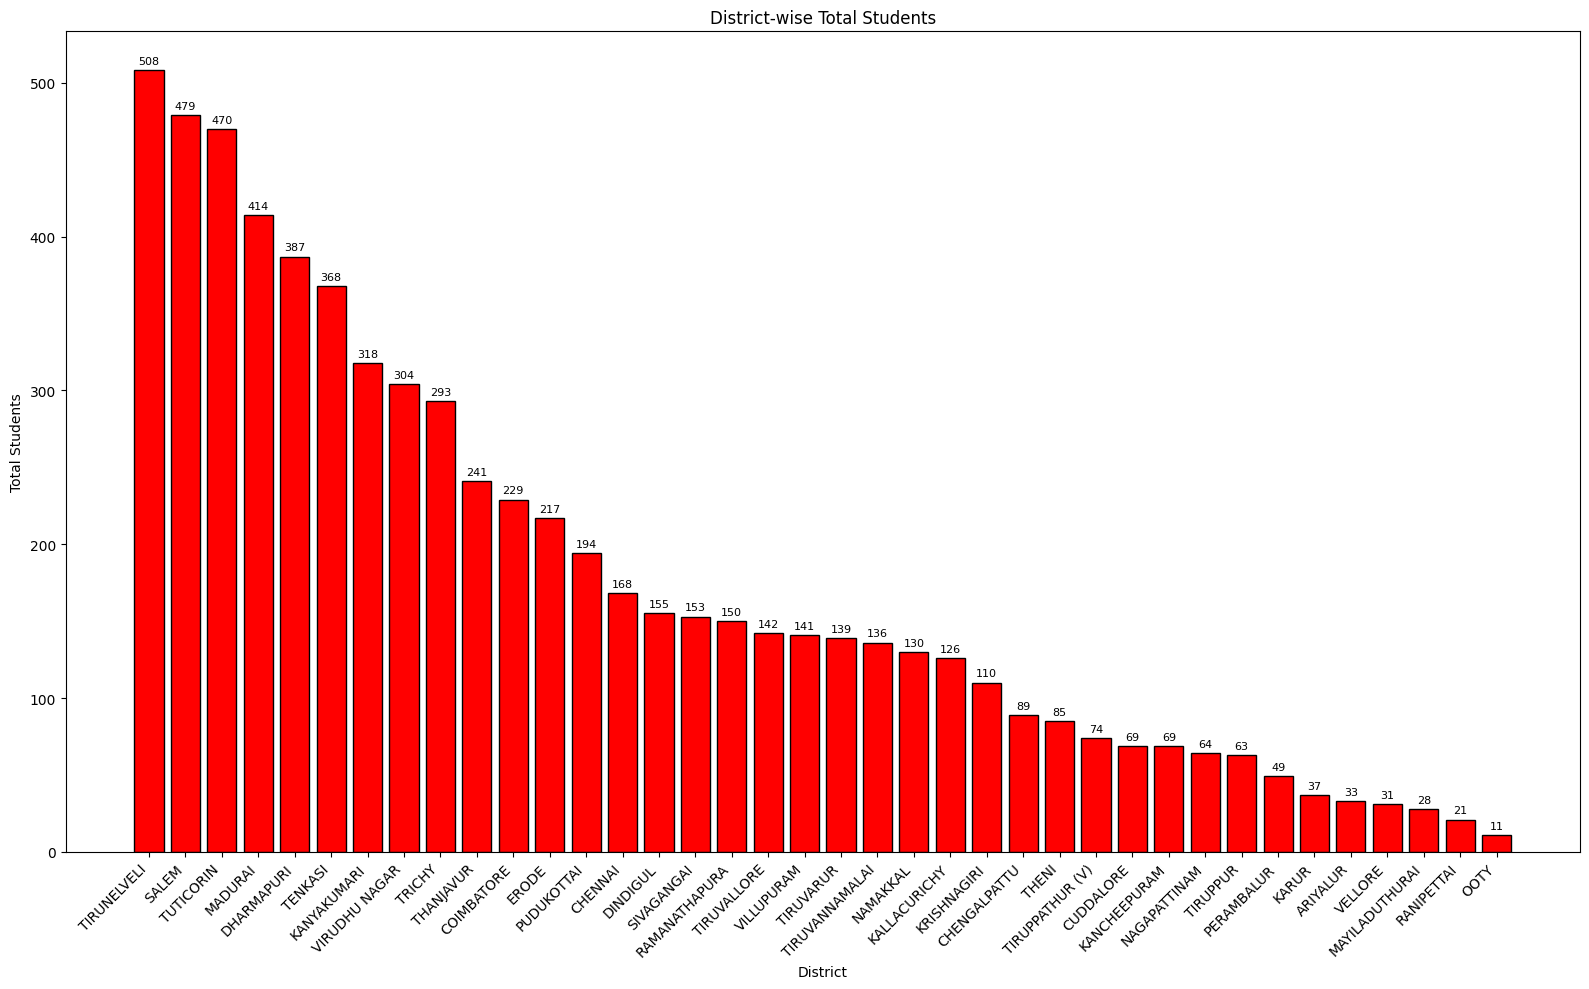

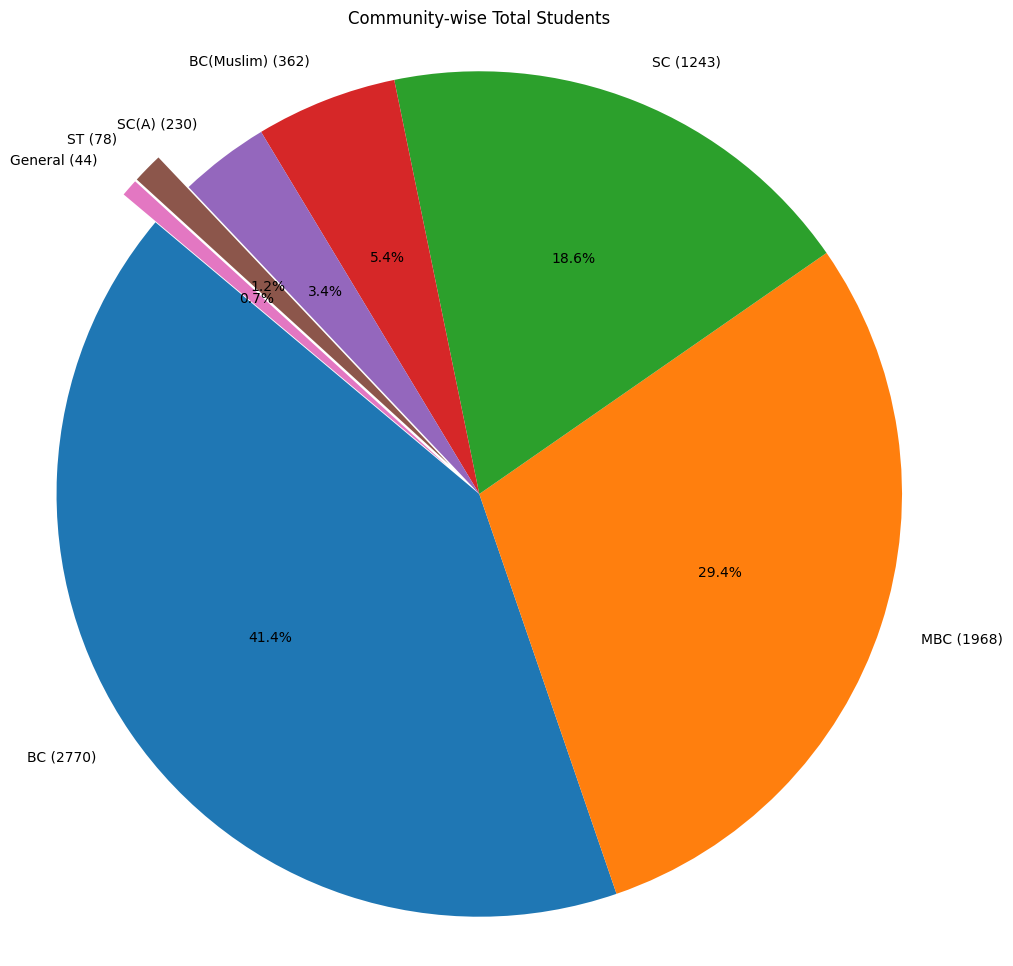

In [17]:
import matplotlib.pyplot as plt

# Bar chart: District-wise total students with values on top
district_counts = df['DISTRICT'].value_counts()
plt.figure(figsize=(16, 10))
bars = plt.bar(district_counts.index, district_counts.values, color='red', edgecolor='black')
plt.xlabel('District')
plt.ylabel('Total Students')
plt.title('District-wise Total Students')
plt.xticks(rotation=45, ha='right')
# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

# Pie chart: Community-wise total students, offset 'General' and 'ST'
community_counts = df['COMMUNITY'].value_counts()
explode = [0.1 if label in ['General', 'ST'] else 0 for label in community_counts.index]
plt.figure(figsize=(12, 12))
plt.pie(
    community_counts,
    labels=[f"{label} ({value})" for label, value in zip(community_counts.index, community_counts.values)],
    autopct='%1.1f%%',
    startangle=140,
    explode=explode
)
plt.title('Community-wise Total Students')
plt.axis('equal')
plt.show()


In [20]:
print(df.columns)
df = df.reset_index()
df.columns = df.columns.str.strip()
print(df.columns)

Index(['SLNo', 'DISTRICT', 'ROLLNO', 'EMIS_NO', 'NAME', 'DOB', 'GENDER',
       'COMMUNITY', 'DISABLITY', 'SCHOOL_NAME', 'MAT', 'SAT', 'TOTAL',
       'SELECTED_CATEGORY'],
      dtype='object')
Index(['index', 'SLNo', 'DISTRICT', 'ROLLNO', 'EMIS_NO', 'NAME', 'DOB',
       'GENDER', 'COMMUNITY', 'DISABLITY', 'SCHOOL_NAME', 'MAT', 'SAT',
       'TOTAL', 'SELECTED_CATEGORY'],
      dtype='object')


In [22]:
combined = combined.reset_index()
print(combined.columns)

Index(['SCHOOL_NAME', 'Student_Count', 'Max_TOTAL', 'Avg_TOTAL',
       'Student_Count_Norm', 'Max_TOTAL_Norm', 'Avg_TOTAL_Norm',
       'Ranking_Score', 'DISTRICT'],
      dtype='object')


In [38]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
import pandas as pd
import textwrap

# Assume 'combined' and 'df' are already prepared as in your code above

# Add 'All Districts' option
districts = sorted(combined['DISTRICT'].unique())
district_options = [{'label': d, 'value': d} for d in districts]
district_options.insert(0, {'label': 'All Districts', 'value': 'ALL'})

metrics = ['Ranking_Score', 'Student_Count', 'Max_TOTAL', 'Avg_TOTAL']
bar_colors = ['#4B8BBE', '#E06C75', '#98C379', '#FFD43B']

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H2("Top 10 Schools Dashboard"),
    dcc.Dropdown(
        id='district-dropdown',
        options=district_options,
        value='ALL',
        clearable=False
    ),
    html.Div([
        dcc.Graph(id='bar-ranking'),
        dcc.Graph(id='bar-student'),
        dcc.Graph(id='bar-max'),
        dcc.Graph(id='bar-avg'),
        dcc.Graph(id='community-pie')
    ], style={'display': 'flex', 'flexWrap': 'wrap', 'gap': '40px'})
])

@app.callback(
    [Output('bar-ranking', 'figure'),
     Output('bar-student', 'figure'),
     Output('bar-max', 'figure'),
     Output('bar-avg', 'figure'),
     Output('community-pie', 'figure')],
    [Input('district-dropdown', 'value')]
)
def update_charts(selected_district):
    if selected_district == 'ALL':
        data = combined.copy()
        filtered = df.copy()
    else:
        data = combined[combined['DISTRICT'] == selected_district]
        filtered = df[df['DISTRICT'] == selected_district]

    # Top 10 schools
    top10 = data.sort_values('Ranking_Score', ascending=False).head(10)
    top10_avg = top10[top10['Student_Count'] >= 2]

    # Bar charts
    bar_figs = []
    for i, metric in enumerate(metrics):
        if metric == 'Avg_TOTAL':
            plot_data = top10_avg
        else:
            plot_data = top10
        labels = [textwrap.fill(str(name), 15) for name in plot_data['SCHOOL_NAME']]
        fig = go.Figure(go.Bar(
            x=plot_data[metric],
            y=labels,
            orientation='h',  # Horizontal bar
            marker_color=bar_colors[i],
            text=[f'{v:.2f}' for v in plot_data[metric]],
            textposition='outside'
        ))
        fig.update_layout(
            title=metric.replace('_', ' '),
            yaxis_title='School Name',
            xaxis_title=metric.replace('_', ' '),
            yaxis_tickfont=dict(size=10),
            margin=dict(l=200),
            width=1200,
            height=400
        )
        fig.update_yaxes(autorange="reversed")
        if not plot_data.empty:
            if metric == 'Ranking_Score':
                fig.update_xaxes(range=[0.2, plot_data[metric].max() * 1.1])
            elif metric in ['Max_TOTAL', 'Avg_TOTAL']:
                fig.update_xaxes(range=[60, plot_data[metric].max() * 1.1])
        bar_figs.append(fig)

    # Community-wise pie chart
    community_counts = filtered['COMMUNITY'].value_counts()
    pie_fig = go.Figure(go.Pie(
        labels=community_counts.index,
        values=community_counts.values,
        textinfo='label+percent+value',
        hole=0.3
    ))
    pie_fig.update_layout(title="Community-wise Total Students", height=400)

    return bar_figs[0], bar_figs[1], bar_figs[2], bar_figs[3], pie_fig

if __name__ == '__main__':
    app.run(debug=True)